In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
base_dir=r"E:\Study DS\New folder (3)"
#"E:\Study DS\New folder (3)"
#"E:\Study DS\dogs-vs-cats\train"

In [3]:
#preprocessing

In [4]:
IMAGE_SIZE=224
BATCH_SIZE=128

# for training
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,   #normaliztion
    zoom_range=0.2,   #augmentation
    horizontal_flip=True,  #augmentation
    validation_split=0.1)


# for testing
validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   #normaliztion
    
    validation_split=0.1
)

In [5]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,    # path 
    target_size=(IMAGE_SIZE,IMAGE_SIZE),   #size 224*244 
    batch_size=BATCH_SIZE,                 # batch size
    subset='training'                        # for trainign
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),     #size 224*244 
    batch_size=BATCH_SIZE,                   # batch size
    subset='validation'                     # for testing
     

) 

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [7]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)   #image size 224*244*  and the 3 is 3 channel RGB and weight are similar to to imagenet dataset pre trained
vgg.output               # downloading the model

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [8]:
#Now when you set the trainable property of a model as False it would skip the weight update step.

for layer in vgg.layers:
    layer.trainable=False

In [9]:
folders=glob(r"E:\Study DS\New folder (3)\*")
#"E:\Study DS\New folder (3)"
print(len(folders))

2


In [10]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epoch=5

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/5
2/2 [==============================] - 48s 35s/step - loss: 1.2296 - accuracy: 0.5833 - val_loss: 0.6322 - val_accuracy: 0.6000
Epoch 2/5
2/2 [==============================] - 44s 32s/step - loss: 0.8490 - accuracy: 0.6389 - val_loss: 0.9561 - val_accuracy: 0.9000
Epoch 3/5
2/2 [==============================] - 42s 12s/step - loss: 0.8471 - accuracy: 0.7278 - val_loss: 0.5029 - val_accuracy: 0.8500
Epoch 4/5
2/2 [==============================] - 42s 12s/step - loss: 0.5918 - accuracy: 0.7833 - val_loss: 0.6753 - val_accuracy: 0.8000
Epoch 5/5
2/2 [==============================] - 42s 12s/step - loss: 0.6281 - accuracy: 0.8111 - val_loss: 0.4753 - val_accuracy: 0.8000


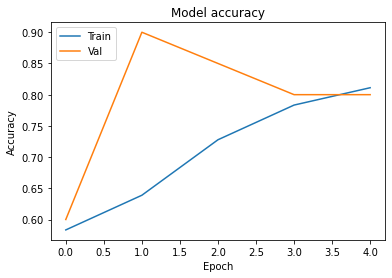

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

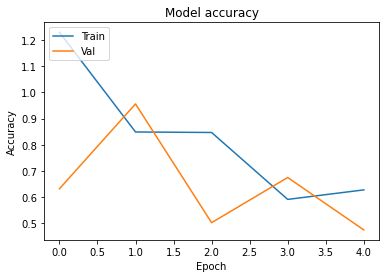

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
# prediction

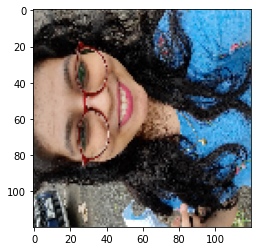

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

# load the image
img = load_img(r"D:\Photos\m31s\Camera\20200816_152837.jpg", target_size=(120,120))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()


In [20]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

img_pred=image.load_img(r"D:\Photos\m31s\Camera\20200816_152837.jpg",target_size=(224,224))
#"E:\Study DS\dogs-vs-cats\test1\test1\30.jpg"
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="abhilasha"
    
    
else:
    prediction="dipesh"
print(prediction)

1/1 [==============================] - 0s 87ms/step
[[1.000000e+00 8.751304e-34]]
abhilasha


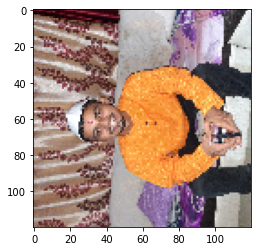

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

# load the image
img = load_img(r"D:\Photos\m31s\Camera\20201116_220638.jpg", target_size=(120,120))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()


In [22]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

img_pred=image.load_img(r"D:\Photos\m31s\Camera\20201116_220638.jpg",target_size=(224,224))
#"E:\Study DS\dogs-vs-cats\test1\test1\30.jpg"
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="abhilasha"
    
    
else:
    prediction="dipesh"
print(prediction)

1/1 [==============================] - 0s 91ms/step
[[5.0337214e-26 1.0000000e+00]]
dipesh


In [30]:
# Save the entire model to a file
model.save('my_modelcatndog.h5')

'''
Saving the model:
You can save the model and its architecture by calling the save() method on the trained model object. 
This method saves the entire model (architecture, weights, and optimizer state) to a file in the specified format.
'''

In [37]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_modelcatndog.h5')
